# Diabetes Prediction 👨🏻‍⚕️🧑🏻‍💻

![6-step-procedure](https://raw.githubusercontent.com/sakethyalamanchili/Diabetes-Prediction-Project/main/6-step-procedure.png)

### 1. Problem Definition
The objective is to predict based on diagnostic measurements whether a patient has diabetes or not.

### 2. Data
- **Number of Instances:** 768
- **Number of Attributes:** 9

Dataset source: [Diabetes Data Set](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

### 3. Evaluation
As we need to predict whether the patient has diabetes or not, this is classified into supervised learning as we use a classification approach. Working on different models with passing better hyperparameters to achieve better accuracy is what defines success.

### 4. Features
- Several constraints were placed on the selection of these instances from a larger database. In particular, ***all patients here are females at least 21 years old*** of Pima Indian heritage.
    1. **Pregnancies:** Number of times pregnant
    2. **Glucose:** Plasma glucose concentration 2 hours after an oral glucose tolerance test
    3. **BloodPressure:** Diastolic blood pressure (mm Hg)
    4. **SkinThickness:** Triceps skinfold thickness (mm)
    5. **Insulin:** 2-Hour serum insulin (mu U/ml)
    6. **BMI:** Body mass index (weight in kg/(height in m)^2)
    7. **DiabetesPedigreeFunction:** It is a numerical score that estimates the genetic risk of diabetes based on family history. It considers the prevalence of diabetes among relatives to assess an individual's likelihood of developing the condition. A higher DPF score indicates a greater genetic predisposition to diabetes.
    8. **Age:** Age (years)
    9. **Outcome:** Class variable (0 or 1)

### 5. Modelling
Let's try working with the following models:
1. ***Logistic Regression***
2. ***RandomForest Classifier***
4. ***SVC***
5. ***Gaussian Naive Bayes***
6. ***XGBoost***
7. ***CatBoost***

## Preparing the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import catboost
import pickle
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import QuantileTransformer

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In general, for a standard **Oral Glucose Tolerance Test (OGTT):**
- ***A normal glucose level 2 hours after the test is typically below 140 mg/dL (milligrams per deciliter).***
- ***A glucose level between 140 to 199 mg/dL is considered impaired glucose tolerance (pre-diabetes).***
- ***A glucose level of 200 mg/dL or higher indicates diabetes.***

The general guidelines for **Diastolic Blood Pressure** are as follows:
- ***Normal: Less than 80 mm Hg***
- ***Elevated: 80-89 mm Hg***
- ***Stage 1 hypertension: 90-99 mm Hg***
- ***Stage 2 hypertension: 100 mm Hg or higher***

The general **BMI categories** and their interpretations for adults:

- ***Underweight: BMI less than 18.5***
- ***Normal weight: BMI between 18.5 and 24.9***
- ***Overweight: BMI between 25 and 29.9***
- ***Obesity: BMI of 30 or higher***

In [5]:
data.duplicated().sum()

0

***Now that we've examined our dataset and found no duplicates, which is excellent. What's even better is that all the features are numerical, and none of them are categorical. Additionally, there are no null values in the dataset.*** 

***Let's proceed with exploratory data analysis (EDA) to uncover relationships between the features.***

## Exploratory Data Analysis (EDA)

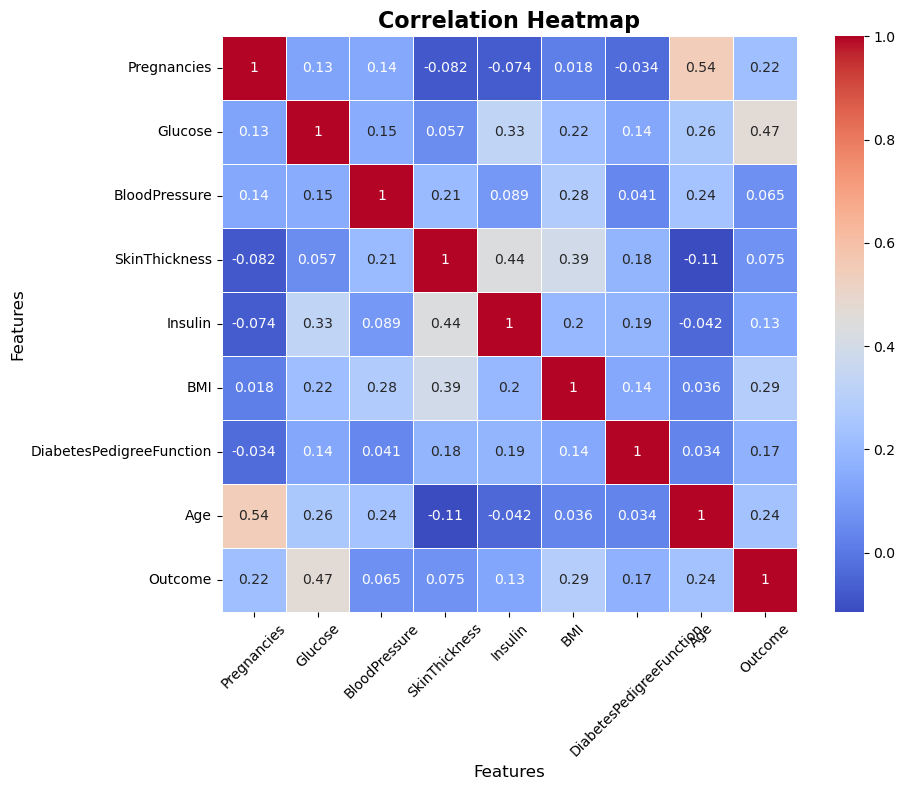

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2g', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

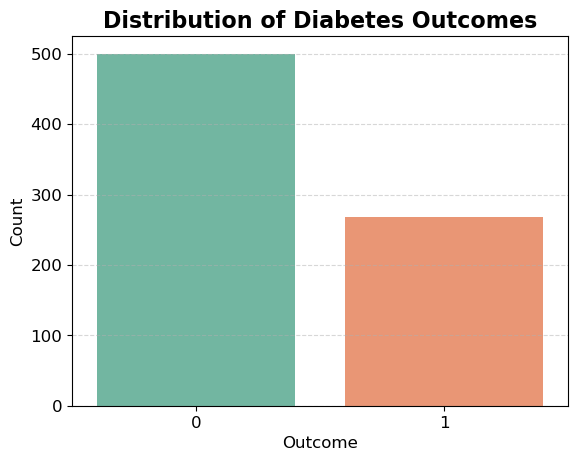

In [7]:
sns.barplot(x=data['Outcome'].value_counts().index, y=data['Outcome'].value_counts(), palette=['#66c2a5', '#fc8d62'])
plt.title("Distribution of Diabetes Outcomes", fontsize=16, fontweight='bold')
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

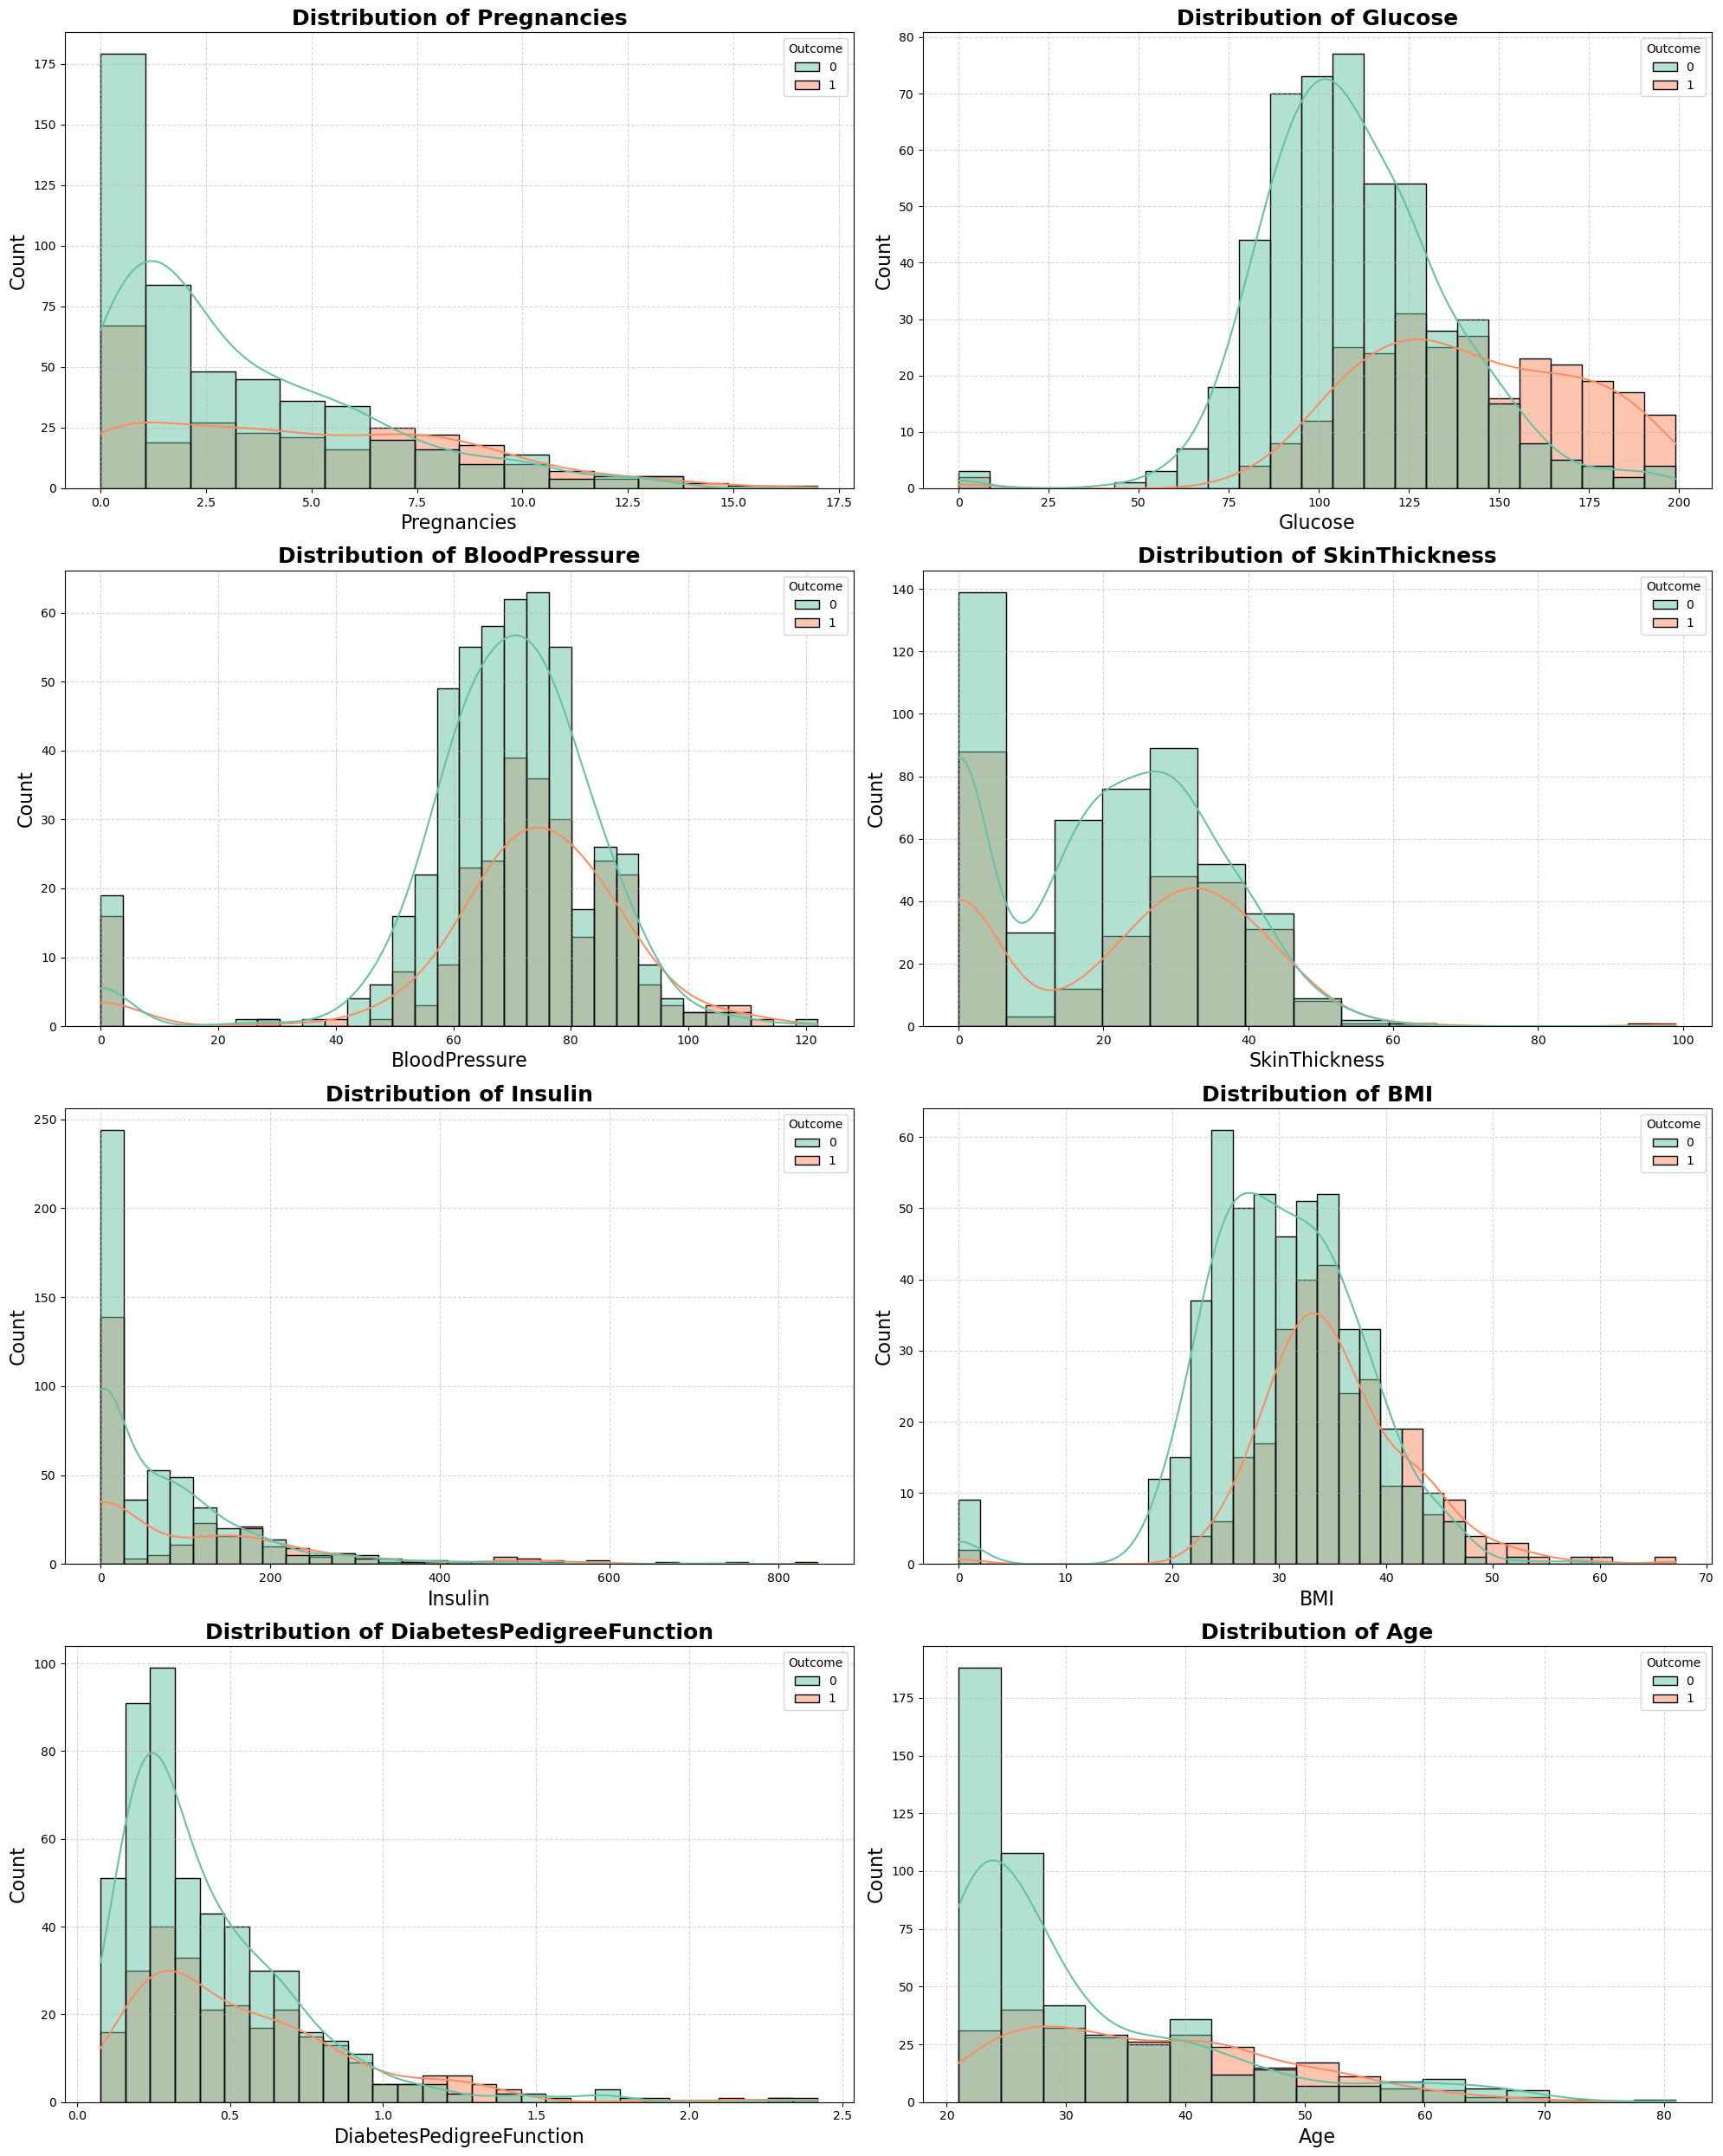

In [8]:
check_distribution = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

colors = ['#66c2a5', '#fc8d62']  # Green for Outcome 0, Orange for Outcome 1

plt.figure(figsize=(20, 25))
for i, feature in enumerate(check_distribution, start=1):
    plt.subplot(4, 2, i)
    sns.histplot(data=data, x=feature, hue='Outcome', kde=True, palette=colors, edgecolor='black')
    plt.title(f"Distribution of {feature}", fontsize=18, fontweight='bold')
    plt.xlabel(feature, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    plt.tight_layout()

plt.show()

In [9]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = len(data)  # Total number of cases in the dataset

for feature in zero_features:
    zero_count = (data[feature] == 0).sum()  # Count of zero values for the feature
    percent_zero = (zero_count / total_count) * 100  # Percentage of cases with zero values
    print(f"{feature}: {zero_count} cases with 0 ({percent_zero:.2f}% of total)")

Glucose: 5 cases with 0 (0.65% of total)
BloodPressure: 35 cases with 0 (4.56% of total)
SkinThickness: 227 cases with 0 (29.56% of total)
Insulin: 374 cases with 0 (48.70% of total)
BMI: 11 cases with 0 (1.43% of total)


### Handling Zero Values in Features

In our dataset, we observed that certain features, such as `SkinThickness` and `Insulin`, have a high number of zero values. While a zero value may be meaningful for these features in the context of diabetes, we lack domain expertise to confirm this.

To address this issue:
1. **Replace with Mean**: We'll initially replace the zero values in these features with the mean value of the respective feature.
   - This approach provides a simple solution to handle zero values, but it may not fully capture the underlying complexity of the data.
   - It allows us to proceed with analysis without making assumptions about the significance of zero values in these features.

2. **Expert Consultation**: Ideally, consulting with a domain expert in diabetes would help validate our decision and provide insights into the significance of zero values in these features.
   - Expert input could guide us in making more informed decisions about handling zero values and interpreting their impact on our analysis.

Since we currently lack domain knowledge in diabetes and expert consultation is unavailable, we'll proceed with replacing zero values with the mean as a pragmatic approach to preprocessing our data.

In [10]:
data_mean = data[zero_features].mean()
data[zero_features] = data[zero_features].replace(0, data_mean)

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


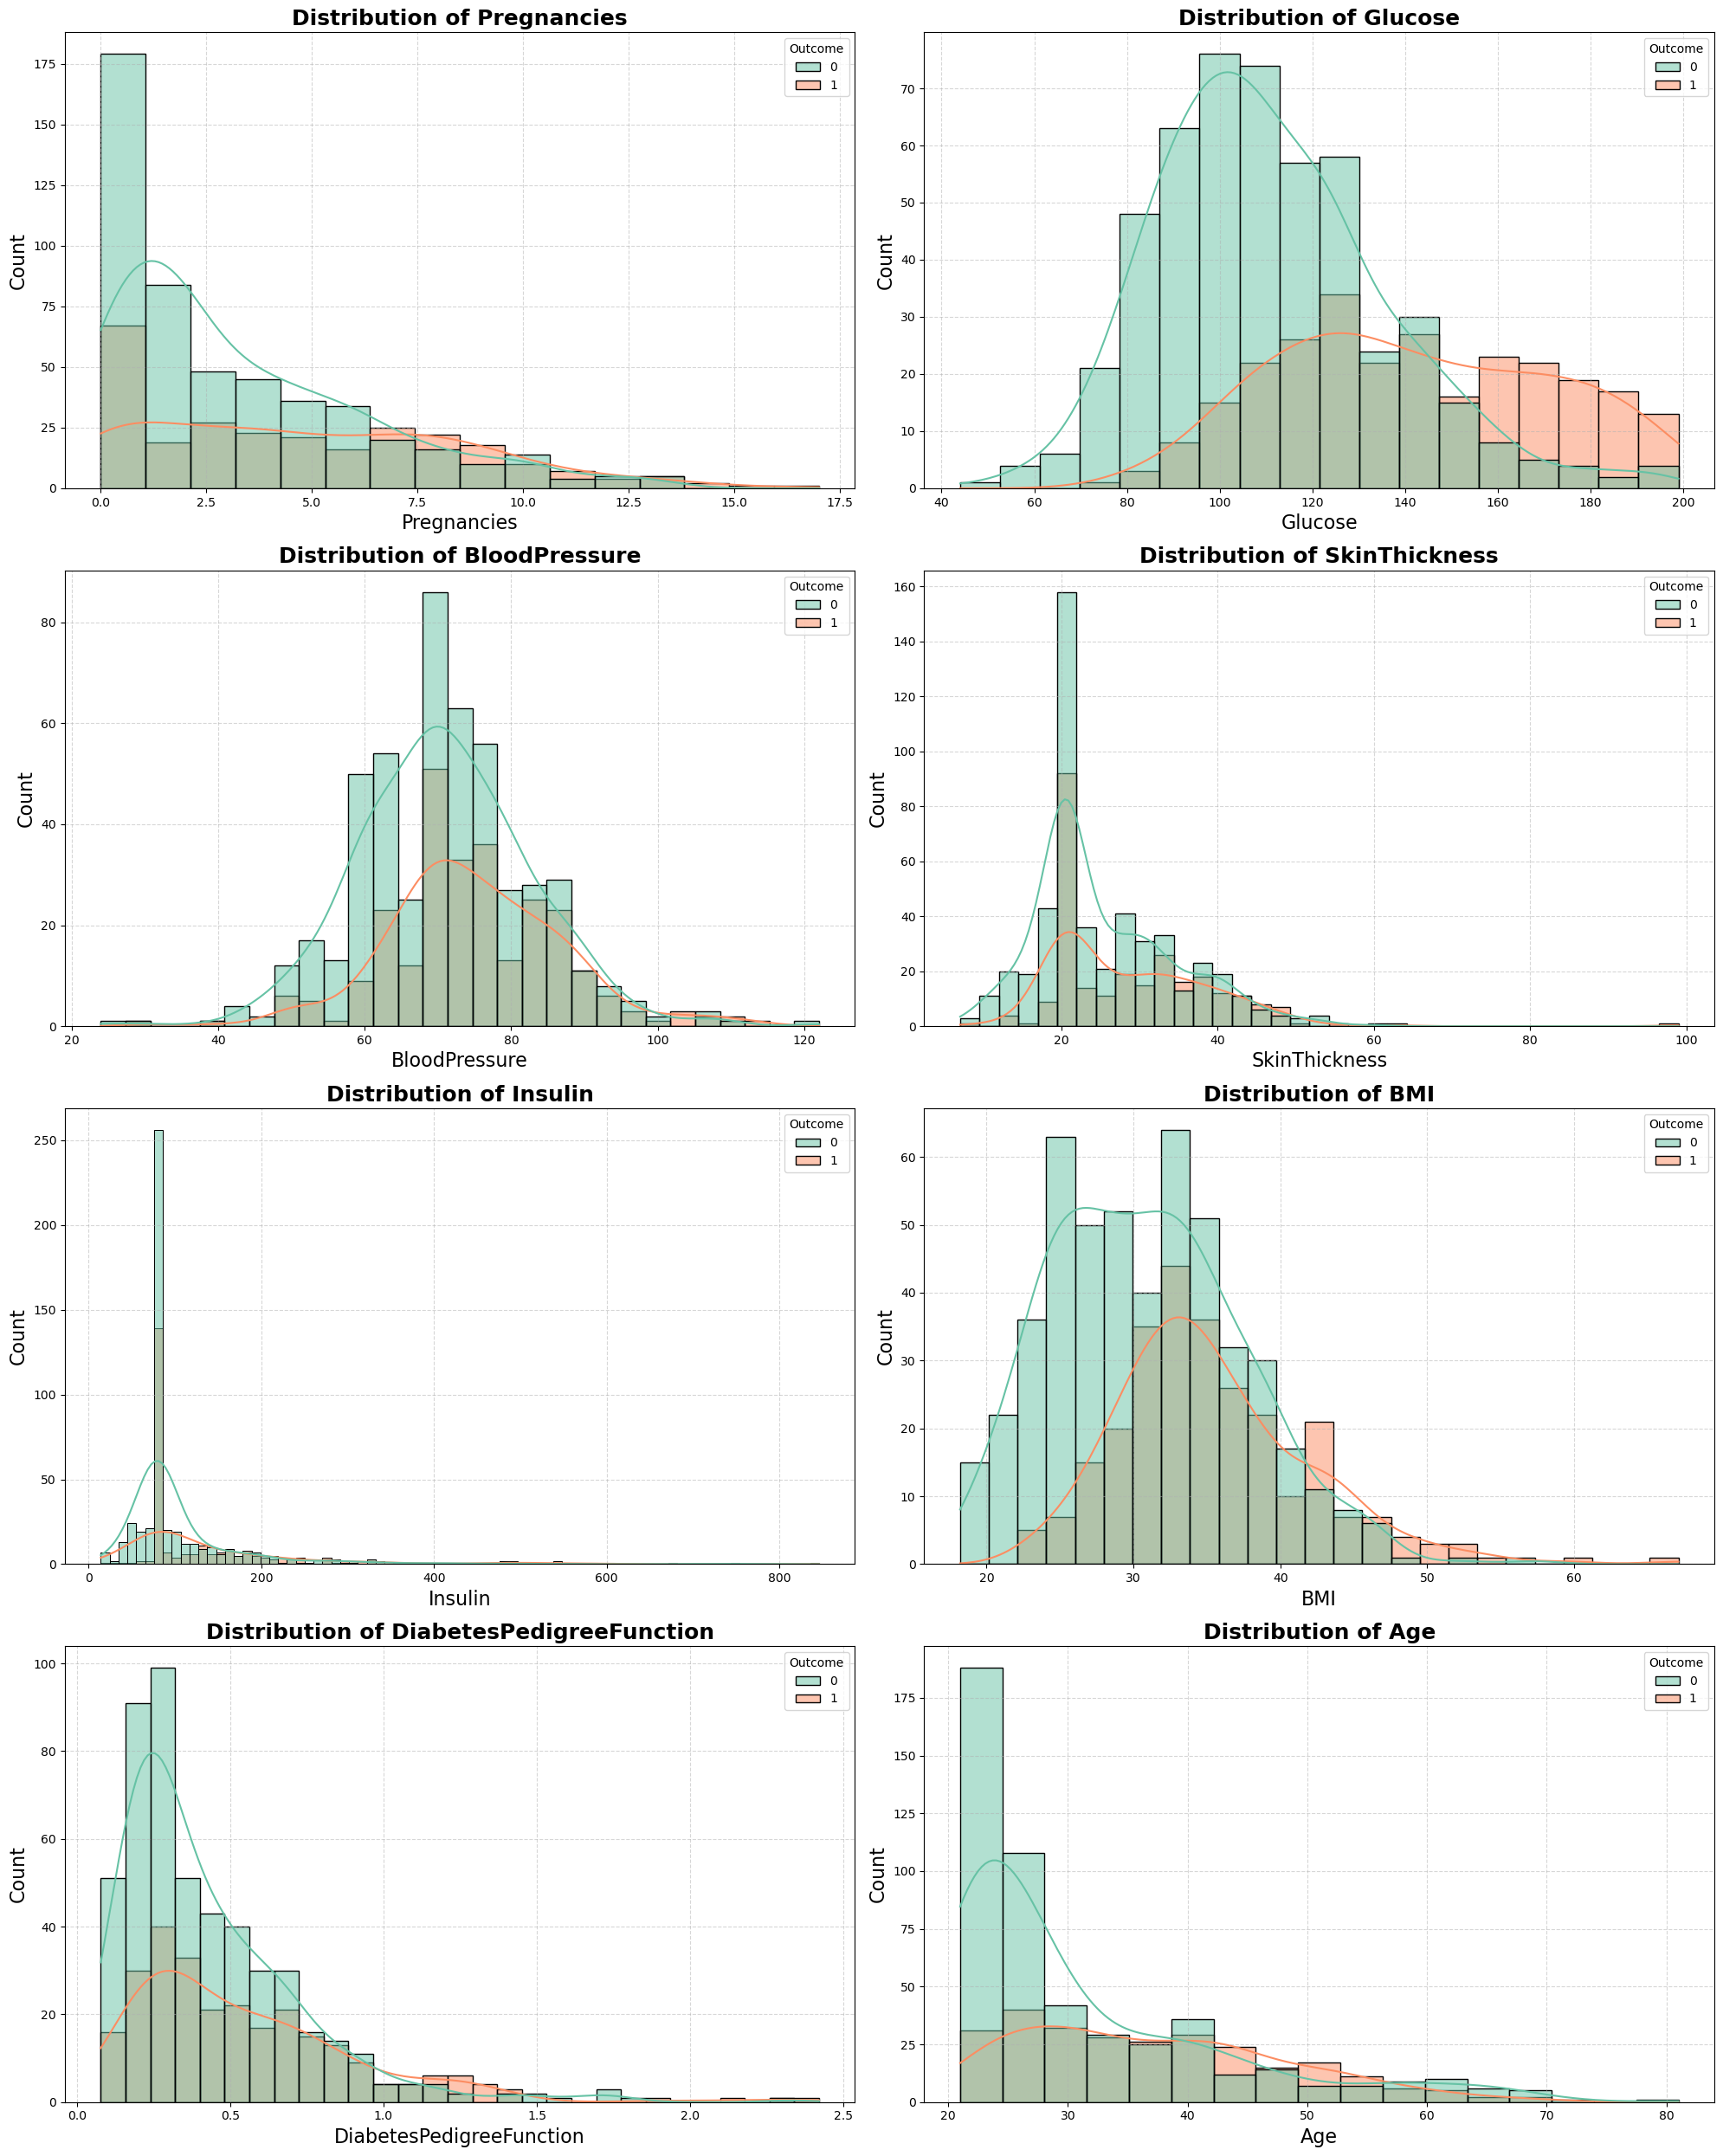

In [12]:
check_distribution = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

colors = ['#66c2a5', '#fc8d62']  # Green for Outcome 0, Orange for Outcome 1

plt.figure(figsize=(20, 25))
for i, feature in enumerate(check_distribution, start=1):
    plt.subplot(4, 2, i)
    sns.histplot(data=data, x=feature, hue='Outcome', kde=True, palette=colors, edgecolor='black')
    plt.title(f"Distribution of {feature}", fontsize=18, fontweight='bold')
    plt.xlabel(feature, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    plt.tight_layout()

plt.show()

## Modelling

In [13]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X.shape, y.shape

((768, 8), (768,))

## Understanding the QuantileTransformer for Data Transformation

The **QuantileTransformer** is a method used for transforming data to make its distribution closer to a normal (or Gaussian) distribution. 

- **One-Sided Shape**: Some features in the dataset may have distributions that are skewed or have a one-sided shape, meaning they are not symmetric around their mean. This can make it challenging to apply certain machine learning algorithms that assume a normal distribution of data.

- **Nonlinear Scaling**: Linear scaling methods like replacing zero values with the mean may not be sufficient to address the skewness or one-sided shape of the distributions. Nonlinear scaling methods, like the QuantileTransformer, can transform the data in a way that makes its distribution closer to a normal distribution.

- **Normal Distribution**: A normal (or Gaussian) distribution is desirable because it has several statistical properties that make it easier to work with in many machine learning algorithms. For example, it's easier to interpret and analyze data when it follows a normal distribution, and many algorithms assume or perform better with normally distributed data.

- **Quantile Transformation**: The QuantileTransformer works by ranking the observations and mapping them onto a specified target distribution, such as the uniform or normal distribution. This transformation effectively reshapes the distribution of the data, making it more symmetric and closer to the target distribution.

For a more detailed explanation, you can check out this [video](https://www.youtube.com/watch?v=ecjN6Xpv6SE).

In [14]:
scaler = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=5)
scaled_X = scaler.fit_transform(X)
scaled_X_df = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.666564,0.873569,0.037988,0.852495,-0.308666,0.239380,0.678858,1.220640
1,-0.731217,-1.335178,-0.559592,0.362241,-0.308666,-0.799083,-0.059586,0.139710
2,1.096804,1.708508,-0.731217,-0.486994,-0.308666,-1.434020,0.788098,0.203961
3,-0.731217,-1.167475,-0.559592,0.012660,0.426762,-0.567010,-1.258282,-5.199338
4,-5.199338,0.574460,-2.405245,0.852495,0.965625,1.447963,2.903113,0.269066
...,...,...,...,...,...,...,...,...
763,1.549706,-0.589456,0.375793,2.049594,1.060280,0.139710,-1.224327,1.938670
764,-0.295415,0.152506,-0.114185,0.242903,-0.308666,0.698526,-0.109678,-0.229884
765,0.458679,0.115788,0.037988,0.012660,0.556634,-0.846886,-0.663579,0.076032
766,-0.731217,0.295415,-1.096804,-0.486994,-0.308666,-0.295415,-0.064474,1.120205


### Use `train_test_split` if:

- **Large Dataset**: When computational resources are limited and you're dealing with a large dataset, `train_test_split` offers a simple and efficient way to split your data into training and testing sets.

- **Quick and Simple Splitting**: If you need a quick and straightforward method to divide your data, `train_test_split` is a convenient choice. It allows you to split your dataset with just a few lines of code.

- **Control Over Split Size**: With `train_test_split`, you have control over the size of the training and testing sets. This flexibility is beneficial when you need to adjust the split size according to your specific requirements.

- **Random State for Reproducibility**: You can specify a random state parameter to ensure reproducibility of results. This is crucial for debugging and sharing code, as it ensures that the same random split is generated each time the code is executed.

### Use `cross_val_score` with Mean if:

- **Small Dataset or Sufficient Resources**: When dealing with a small dataset or when computational resources are not a constraint, `cross_val_score` with mean provides a more reliable estimate of model performance.

- **More Reliable Performance Estimates**: `cross_val_score` performs k-fold cross-validation, averaging results over multiple folds. This approach provides a more stable estimate of model performance compared to a single train-test split.

- **Model Comparison and Hyperparameter Tuning**: If you need to compare different models or hyperparameters and select the best-performing one, `cross_val_score` with mean is the preferred method. It helps in identifying the model with the highest performance across multiple folds of cross-validation.

In summary, choose `train_test_split` for quick and simple splitting with control over split size, especially for large datasets and limited computational resources. Opt for `cross_val_score` with mean for more reliable performance estimates, model comparison, and hyperparameter tuning, particularly with small datasets or when computational resources are sufficient.

In [101]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNeighbors Classifier" : KNeighborsClassifier(),
    "RandomForest Classifier" : RandomForestClassifier(),
    "SVC" : SVC(),
    "Gaussian Naive Bayes" : GaussianNB(),
    "XGBoost" : XGBClassifier(),
    "CatBoost" : CatBoostClassifier(verbose=False)
}

In [102]:
model_mean_scores_scaled_X = {}

for model_name, model in models.items():
    np.random.seed(5)
    scores = cross_val_score(model, scaled_X_df, y, cv=3, n_jobs=-1)
    model_mean_scores_scaled_X[model_name] = np.mean(scores)
    print(f"{model_name}: {np.mean(scores)}\n")

Logistic Regression: 0.7682291666666666

KNeighbors Classifier: 0.7408854166666666

RandomForest Classifier: 0.7578125

SVC: 0.76171875

Gaussian Naive Bayes: 0.7421875

XGBoost: 0.7265625

CatBoost: 0.75



In [17]:
model_mean_scores_X = {}

for model_name, model in models.items():
    np.random.seed(5)
    scores = cross_val_score(model, X, y, cv=3, n_jobs=-1)
    model_mean_scores_X[model_name] = np.mean(scores)
    print(f"{model_name}: {np.mean(scores)}\n")

Logistic Regression: 0.7734375

KNeighbors Classifier: 0.7135416666666666

RandomForest Classifier: 0.7682291666666666

SVC: 0.7552083333333334

Gaussian Naive Bayes: 0.7395833333333334

XGBoost: 0.7265625

CatBoost: 0.75



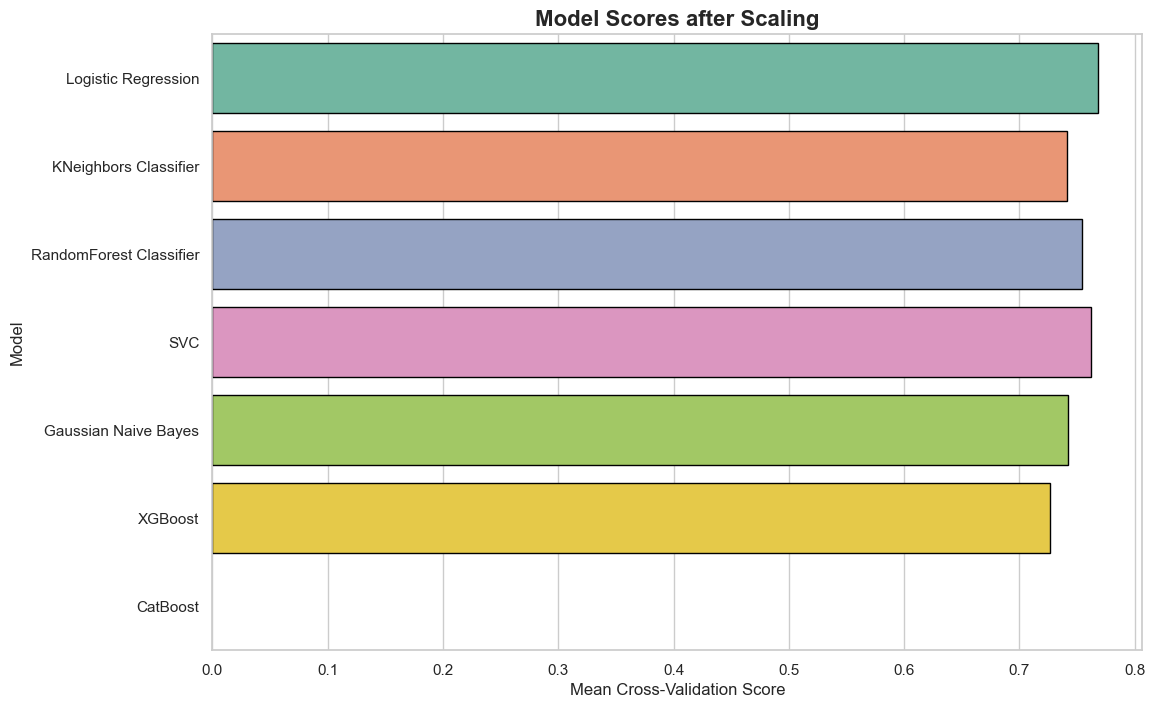

In [18]:
colors = sns.color_palette("Set2")
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(x=list(model_mean_scores_scaled_X.values()), y=list(model_mean_scores_scaled_X.keys()), palette=colors, edgecolor='black')
plt.title("Model Scores after Scaling", fontsize=16, fontweight='bold')
plt.xlabel("Mean Cross-Validation Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

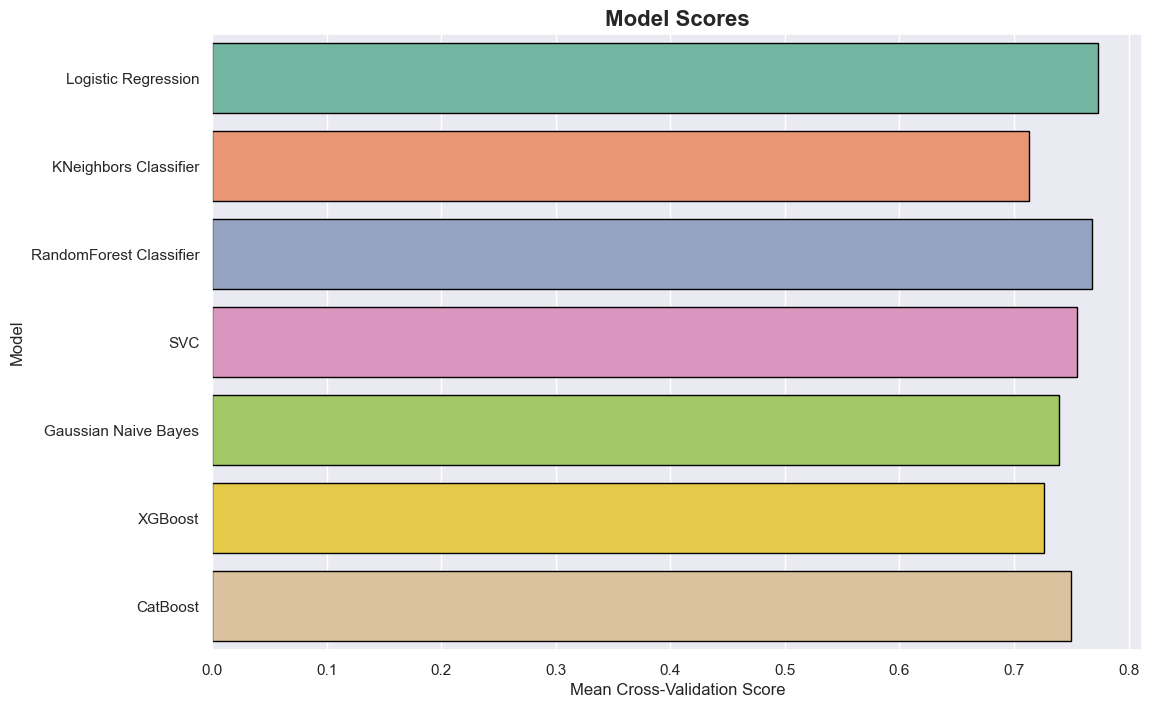

In [19]:
colors = sns.color_palette("Set2")
sns.set(style='darkgrid')
plt.figure(figsize=(12, 8))
sns.barplot(x=list(model_mean_scores_X.values()), y=list(model_mean_scores_X.keys()), palette=colors, edgecolor='black')
plt.title("Model Scores", fontsize=16, fontweight='bold')
plt.xlabel("Mean Cross-Validation Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### Next Steps: Hyperparameter Tuning with `GridSearch`

Now that we have a baseline model, it's important to fine-tune its performance through hyperparameter tuning. Here's what we can do:

1. **Hyperparameter Tuning**: Use `GridSearchCV` to systematically explore different combinations of hyperparameters and identify the optimal ones that maximize the model's performance.

2. **Evaluate Changes in Accuracy**: Compare the accuracy values before and after hyperparameter tuning to assess the impact of the tuning process on the model's performance.

3. **Select the Best Model**: After hyperparameter tuning, choose the model with the highest accuracy as our final model for prediction.

By performing hyperparameter tuning with `GridSearchCV`, we can enhance the model's predictive power and make more informed decisions based on the refined model.


In [20]:
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_X_df, y, 
                                                                                test_size=0.2, random_state=5)

scaled_X_train.shape, scaled_X_test.shape, scaled_y_train.shape, scaled_y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### 1. Logistic Regression

In [22]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
lgr_param = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga'],
    'max_iter': [1000, 5000],
    'random_state': [5]
}

In [24]:
lgr_gridcv = GridSearchCV(LogisticRegression(), param_grid=lgr_param, cv=3, n_jobs=-1)

In [25]:
lgr_gridcv.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [1000, 5000],
                         'penalty': ['l1', 'l2'], 'random_state': [5],
                         'solver': ['liblinear', 'saga']})

In [26]:
scaled_lgr_accuracy = lgr_gridcv.score(scaled_X_test, scaled_y_test)
scaled_lgr_accuracy

0.7987012987012987

In [27]:
lgr_gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [1000, 5000],
                         'penalty': ['l1', 'l2'], 'random_state': [5],
                         'solver': ['liblinear', 'saga']})

In [28]:
lgr_gridcv.best_params_

{'C': 1,
 'max_iter': 1000,
 'penalty': 'l1',
 'random_state': 5,
 'solver': 'liblinear'}

In [29]:
lgr_accuracy = lgr_gridcv.score(X_test, y_test)
lgr_accuracy

0.8181818181818182

### 2. KNeighbors Classifier

In [30]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [31]:
knn_param = {
    'n_neighbors': [5, 50, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]
}

In [32]:
knn_gridcv = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param, n_jobs=-1, cv=3)

In [33]:
knn_gridcv.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'], 'n_neighbors': [5, 50, 100],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [34]:
knn_gridcv.best_params_

{'metric': 'minkowski', 'n_neighbors': 50, 'p': 2, 'weights': 'distance'}

In [35]:
scaled_knn_accuracy = knn_gridcv.score(scaled_X_test, scaled_y_test)
scaled_knn_accuracy

0.7337662337662337

In [36]:
knn_gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'], 'n_neighbors': [5, 50, 100],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [37]:
knn_accuracy = knn_gridcv.score(X_test, y_test)
knn_accuracy

0.7662337662337663

### 3. RandomForest Classifier

In [38]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
rf_param = {
    'n_estimators': [50, 100, 200],
    "max_features" : ['sqrt', 'log2'],
    "min_samples_leaf" : [1,5],
    "min_samples_split" : [2,4],
    "random_state": [5]
}

In [40]:
rf_gridcv = GridSearchCV(RandomForestClassifier(), param_grid=rf_param, cv=3, n_jobs=-1)

In [41]:
rf_gridcv.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 200], 'random_state': [5]})

In [42]:
rf_gridcv.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 5}

In [43]:
scaled_rf_accuracy = rf_gridcv.score(scaled_X_test, scaled_y_test)
scaled_rf_accuracy

0.8051948051948052

In [44]:
rf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 200], 'random_state': [5]})

In [45]:
rf_accuracy = rf_gridcv.score(X_test, y_test)
rf_accuracy

0.8116883116883117

### 4. SVC

In [46]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [47]:
svc_param = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'Poly', 'rbf'],
    'decision_function_shape': ['ovo', 'ovr'],
    'random_state': [5]
}

In [48]:
svc_gridcv = GridSearchCV(SVC(), param_grid=svc_param, cv=3, n_jobs=-1)

In [49]:
svc_gridcv.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'Poly', 'rbf'],
                         'random_state': [5]})

In [50]:
svc_gridcv.best_params_

{'C': 1,
 'decision_function_shape': 'ovo',
 'kernel': 'linear',
 'random_state': 5}

In [51]:
scaled_svc_accuracy = svc_gridcv.score(scaled_X_test, scaled_y_test)
scaled_svc_accuracy

0.8051948051948052

In [52]:
svc_gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'Poly', 'rbf'],
                         'random_state': [5]})

In [53]:
svc_accuracy = svc_gridcv.score(X_test, y_test)
svc_accuracy

0.8051948051948052

### 5. Gaussian Naive Bayes

In [54]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [55]:
gnb_param = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
}

>***`var_smoothing` in Gaussian Naive Bayes helps prevent division by zero and stabilizes probability calculations, especially for features with small variances, by adding a small smoothing factor to the variances. This improves the robustness and generalization performance of the model.***

In [56]:
gnb_gridcv = GridSearchCV(GaussianNB(), param_grid=gnb_param, cv=3, n_jobs=-1)

In [57]:
gnb_gridcv.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06]})

In [58]:
scaled_gnb_accuracy = gnb_gridcv.score(scaled_X_test, scaled_y_test)
scaled_gnb_accuracy

0.7987012987012987

In [59]:
gnb_gridcv.best_params_

{'var_smoothing': 1e-10}

In [60]:
gnb_gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06]})

In [61]:
gnb_accuracy = gnb_gridcv.score(X_test, y_test)
gnb_accuracy

0.7792207792207793

### 6. XGBoost

In [62]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [63]:
xgb_param = {
    'objective': ['binary:logistic'],
    'eval_metric': ['error'],
    'gamma': [0, 0.25, 1.0],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3,4,5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [0, 1, 10, 20],
    'scale_pos_weight': [1,3,5],
    'random_state': [5]
}

In [64]:
xgb_gridcv = GridSearchCV(XGBClassifier(), param_grid=xgb_param, n_jobs=-1, cv=3)

In [65]:
xgb_gridcv.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'eval_metric': ['error'], 'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 4, 5],
                         'objective': ['binary:logistic'], 'random_state': [5],
                         'reg_lambda': [0, 1, 10, 20],
                         'scale_pos_weight': [1, 3, 5],
                         'subsample': [0.8, 1.0]})

In [66]:
xgb_gridcv.best_params_

{'colsample_bytree': 0.8,
 'eval_metric': 'error',
 'gamma': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'objective': 'binary:logistic',
 'random_state': 5,
 'reg_lambda': 20,
 'scale_pos_weight': 1,
 'subsample': 1.0}

In [67]:
scaled_xgb_accuracy = xgb_gridcv.score(scaled_X_test, scaled_y_test)
scaled_xgb_accuracy

0.7922077922077922

In [68]:
xgb_gridcv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'eval_metric': ['error'], 'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 4, 5],
                         'objective': ['binary:logistic'], 'random_state': [5],
                         'reg_lambda': [0, 1, 10, 20],
                         'scale_pos_weight': [1, 3, 5],
                         'subsample': [0.8, 1.0]})

In [69]:
xgb_accuracy = xgb_gridcv.score(X_test, y_test)
xgb_accuracy

0.7922077922077922

### 7. CatBoost

In [70]:
cat_param = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 5, 6],
    'n_estimators': [10, 50, 100],
    'l2_leaf_reg': [1, 3, 5],
    'random_seed': [5]
}

In [71]:
cat_gridcv = GridSearchCV(CatBoostClassifier(verbose=False), param_grid=cat_param, n_jobs=-1, cv=3)

In [72]:
cat_gridcv.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000024E335D5310>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100], 'random_seed': [5]})

In [73]:
cat_gridcv.best_params_

{'depth': 4,
 'l2_leaf_reg': 5,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'random_seed': 5}

In [74]:
scaled_cat_accuracy = cat_gridcv.score(scaled_X_test, scaled_y_test)
scaled_cat_accuracy

0.8246753246753247

In [75]:
cat_gridcv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000024E335D5310>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100], 'random_seed': [5]})

In [76]:
cat_accuracy = cat_gridcv.score(X_test, y_test)
cat_accuracy

0.8246753246753247

## Accuracy Comparison

In [77]:
scaled_model_accuracy = {
    "Logistic Regression" : scaled_lgr_accuracy,
    "KNeighbors Classifier" : scaled_knn_accuracy,
    "RandomForest Classifier" : scaled_rf_accuracy,
    "SVC" : scaled_svc_accuracy,
    "Gaussian Naive Bayes" : scaled_gnb_accuracy,
    "XGBoost" : scaled_xgb_accuracy,
    "CatBoost" : scaled_cat_accuracy
}

scaled_model_accuracy

{'Logistic Regression': 0.7987012987012987,
 'KNeighbors Classifier': 0.7337662337662337,
 'RandomForest Classifier': 0.8051948051948052,
 'SVC': 0.8051948051948052,
 'Gaussian Naive Bayes': 0.7987012987012987,
 'XGBoost': 0.7922077922077922,
 'CatBoost': 0.8246753246753247}

In [78]:
model_accuracy = {
    "Logistic Regression" : lgr_accuracy,
    "KNeighbors Classifier" : knn_accuracy,
    "RandomForest Classifier" : rf_accuracy,
    "SVC" : svc_accuracy,
    "Gaussian Naive Bayes" : gnb_accuracy,
    "XGBoost" : xgb_accuracy,
    "CatBoost" : cat_accuracy
}

model_accuracy

{'Logistic Regression': 0.8181818181818182,
 'KNeighbors Classifier': 0.7662337662337663,
 'RandomForest Classifier': 0.8116883116883117,
 'SVC': 0.8051948051948052,
 'Gaussian Naive Bayes': 0.7792207792207793,
 'XGBoost': 0.7922077922077922,
 'CatBoost': 0.8246753246753247}

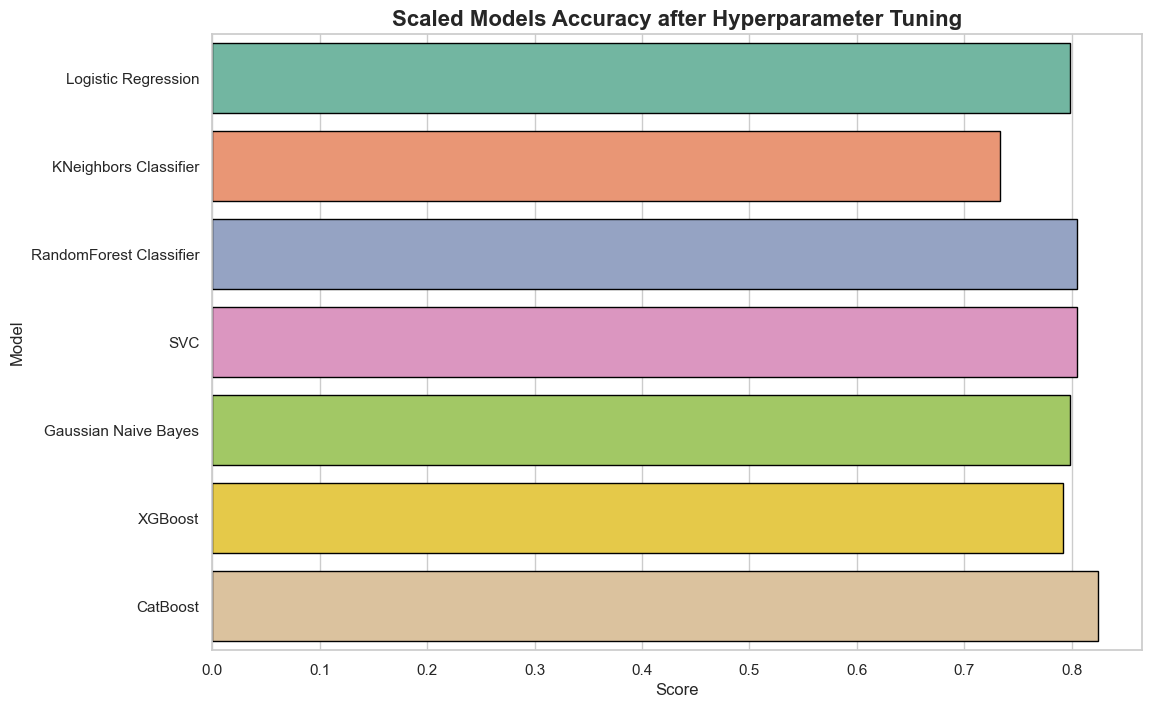

In [79]:
colors = sns.color_palette("Set2")

sns.set(style='whitegrid')

plt.figure(figsize=(12, 8))
sns.barplot(x=list(scaled_model_accuracy.values()), y=list(scaled_model_accuracy.keys()), 
            palette=colors, edgecolor='black')

plt.title("Scaled Models Accuracy after Hyperparameter Tuning", fontsize=16, fontweight='bold')
plt.xlabel("Score", fontsize=12)
plt.ylabel("Model", fontsize=12)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

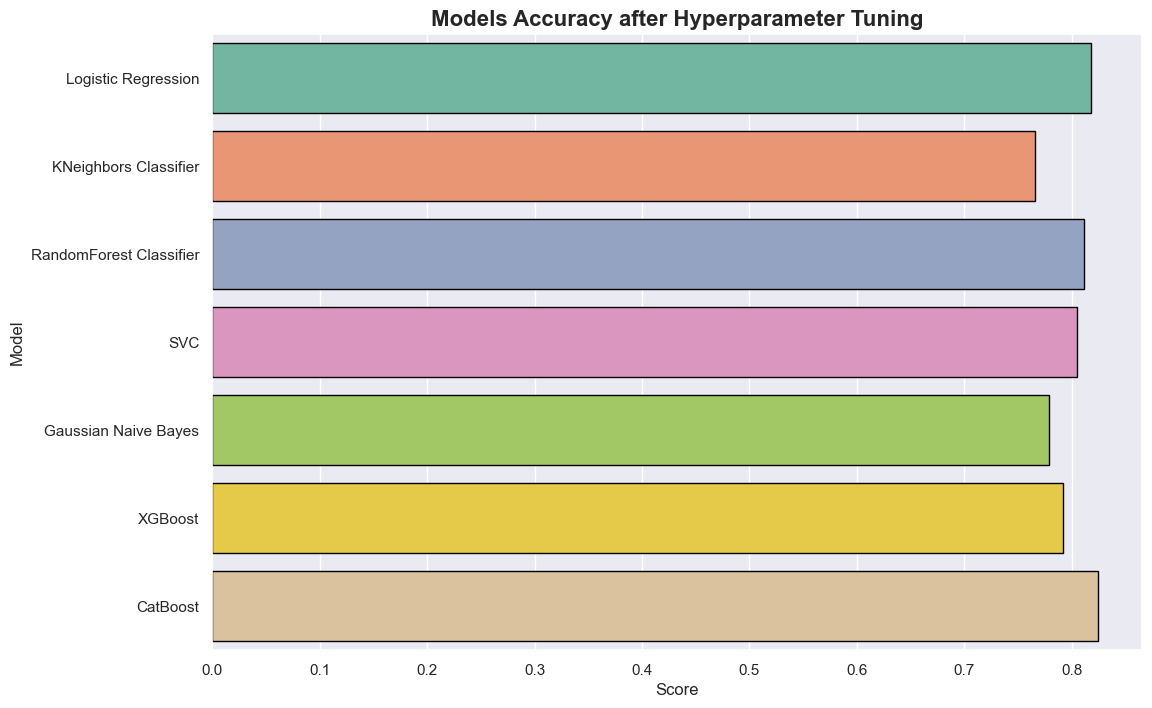

In [80]:
colors = sns.color_palette("Set2")

sns.set(style='darkgrid')

plt.figure(figsize=(12, 8))
sns.barplot(x=list(model_accuracy.values()), y=list(model_accuracy.keys()), 
            palette=colors, edgecolor='black')

plt.title("Models Accuracy after Hyperparameter Tuning", fontsize=16, fontweight='bold')
plt.xlabel("Score", fontsize=12)
plt.ylabel("Model", fontsize=12)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

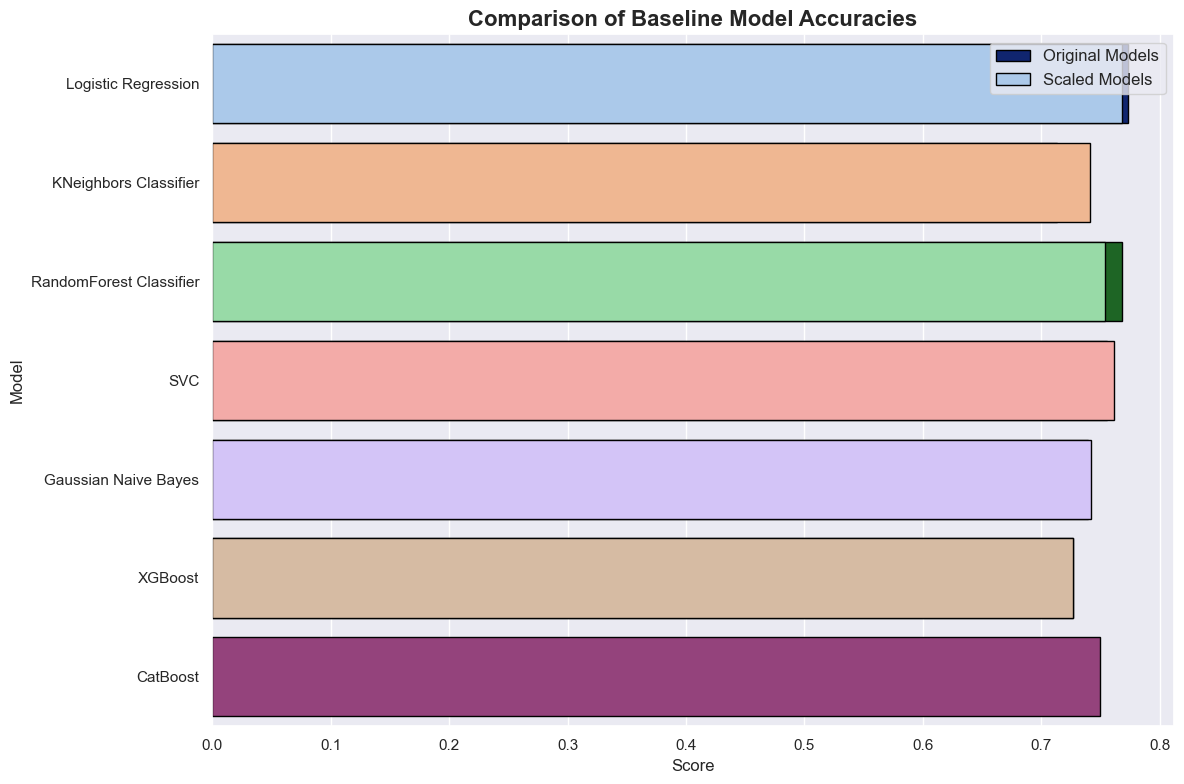

In [81]:
original_palette = sns.color_palette("dark")
scaled_palette = sns.color_palette("pastel")

sns.set(style='darkgrid')

plt.figure(figsize=(12, 8))

sns.barplot(x=list(model_mean_scores_X.values()), y=list(model_mean_scores_X.keys()), 
            palette=original_palette, edgecolor='black', label='Original Models')

sns.barplot(x=list(model_mean_scores_scaled_X.values()), y=list(model_mean_scores_scaled_X.keys()), 
            palette=scaled_palette, edgecolor='black', label='Scaled Models')

plt.title("Comparison of Baseline Model Accuracies", fontsize=16, fontweight='bold')
plt.xlabel("Score", fontsize=12)
plt.ylabel("Model", fontsize=12)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

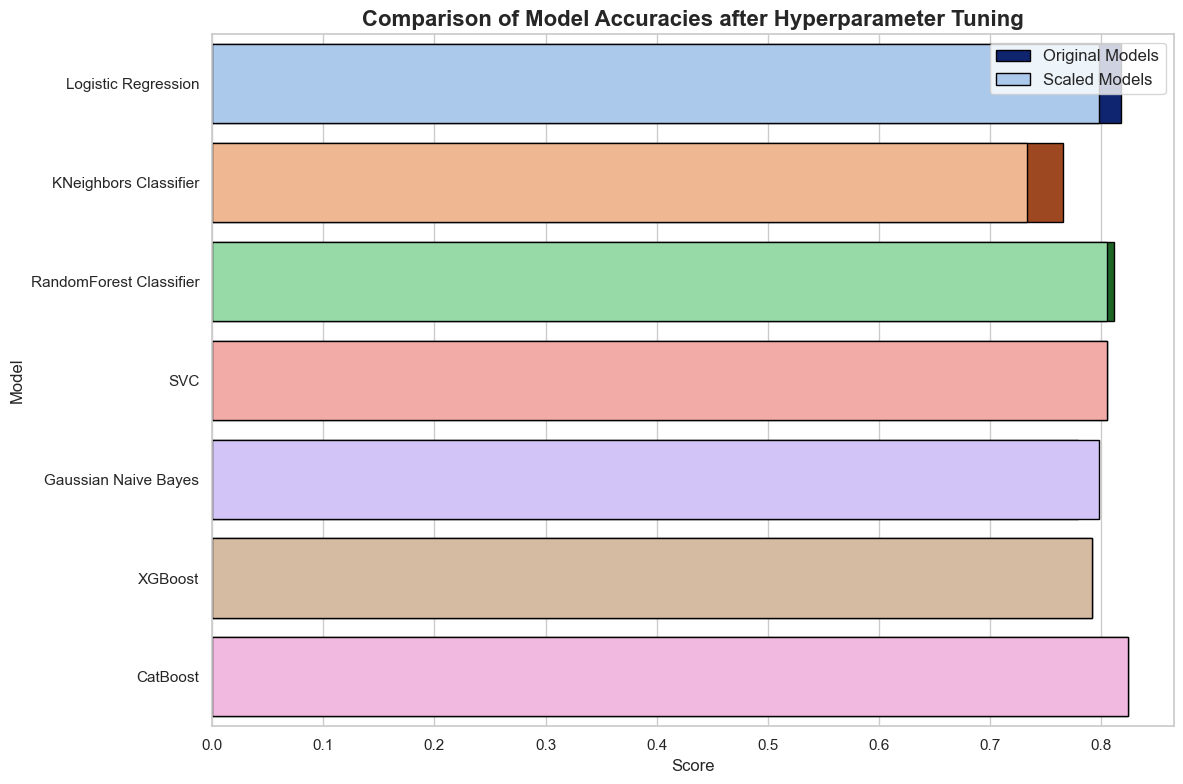

In [82]:
original_palette = sns.color_palette("dark")
scaled_palette = sns.color_palette("pastel")

sns.set(style='whitegrid')

plt.figure(figsize=(12, 8))

sns.barplot(x=list(model_accuracy.values()), y=list(model_accuracy.keys()), 
            palette=original_palette, edgecolor='black', label='Original Models')

sns.barplot(x=list(scaled_model_accuracy.values()), y=list(scaled_model_accuracy.keys()), 
            palette=scaled_palette, edgecolor='black', label='Scaled Models')

plt.title("Comparison of Model Accuracies after Hyperparameter Tuning", fontsize=16, fontweight='bold')
plt.xlabel("Score", fontsize=12)
plt.ylabel("Model", fontsize=12)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

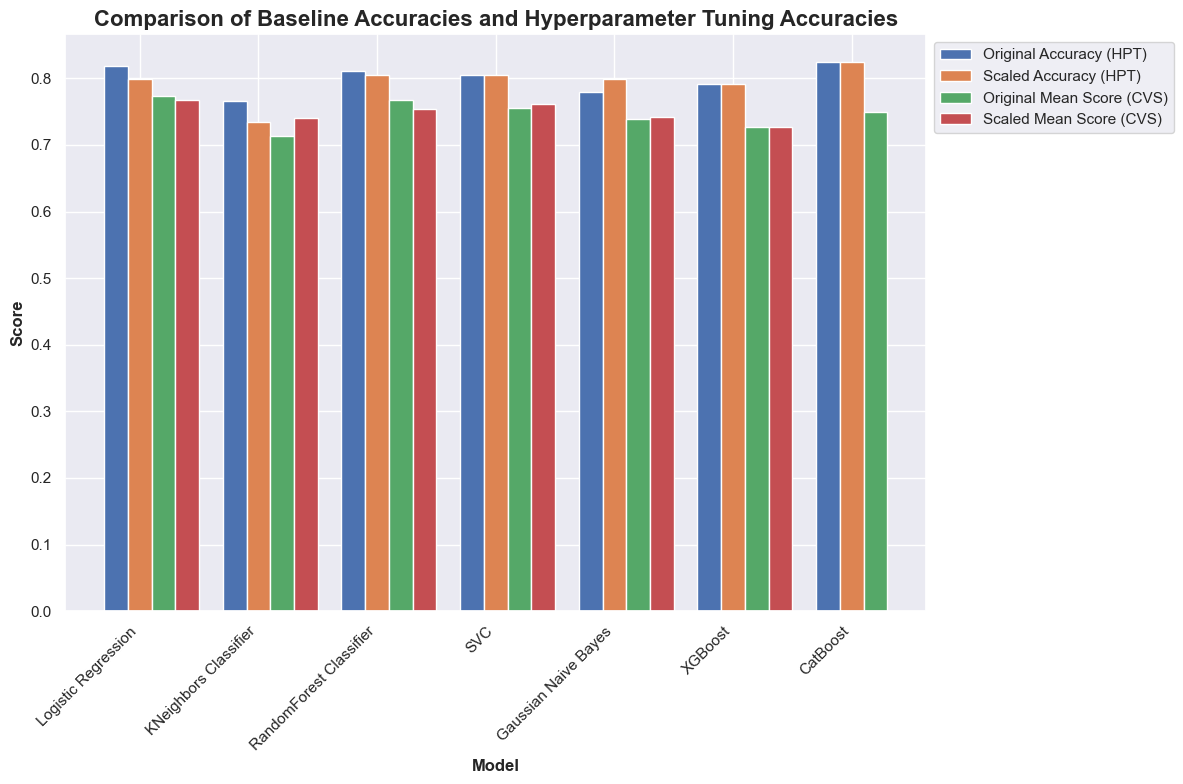

In [83]:
# Set the darkgrid style
sns.set(style='darkgrid')

# Define data
models = list(model_accuracy.keys())
scores = ['Original Accuracy (HPT)', 'Scaled Accuracy (HPT)', 'Original Mean Score (CVS)', 'Scaled Mean Score (CVS)']
accuracy_values = [list(model_accuracy.values()), list(scaled_model_accuracy.values()), 
                   list(model_mean_scores_X.values()), list(model_mean_scores_scaled_X.values())]

# Set the width of the bars
bar_width = 0.2

# Set the x locations for the groups
index = np.arange(len(models))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bars for each score type
for i, score in enumerate(scores):
    ax.bar(index + i*bar_width, accuracy_values[i], bar_width, label=score)

# Set labels and title
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparison of Baseline Accuracies and Hyperparameter Tuning Accuracies', fontsize=16, fontweight='bold')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models, rotation=45, ha='right')

# Adjust legend placement
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Choosing the Best Model and Saving It using `pickle`
***After performing baseline modeling using `cross_val_score` both with and without scaling, as well as performing hyperparameter tuning using `GridSearchCV`, we have obtained some results, as seen earlier. Now, it's time to choose the best model and save it.***

***Upon thorough comparison, it was found that `CatBoost` performed better, especially when hyperparameter tuning was applied. Therefore, we will save the CatBoost model. Considering that both scaled and normal models achieved accuracies of `0.82`, we will opt for the normal model with hyperparameter tuning.***

In [84]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data = np.asarray(input_data)
prediction = cat_gridcv.predict(input_data)
print(prediction)

if prediction == 0:
    print("The person is not Diabetic.")
else:
    print("The person is Diabetes.")

1
The person is Diabetes.


In [85]:
filename = "trained_diabetes_model_catboost.sav"
pickle.dump(cat_gridcv, open(file=filename, mode='wb'))

In [86]:
# Loading the saved model
loaded_model = pickle.load(open("trained_diabetes_model_catboost.sav", mode='rb'))

In [88]:
input_data1 = (5,166,72,19,175,25.8,0.587,51)
input_data1 = np.asarray(input_data1)
prediction = loaded_model.predict(input_data1)
print(prediction)

if prediction == 0:
    print("The person is not Diabetic.")
else:
    print("The person is Diabetic.")

1
The person is Diabetic.


## Versions

In [89]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: D:\Anaconda-Navigator\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex


In [90]:
pip show numpy

Name: numpyNote: you may need to restart the kernel to use updated packages.

Version: 1.24.3
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: D:\Anaconda-Navigator\Lib\site-packages
Requires: 
Required-by: altair, astropy, bokeh, Bottleneck, catboost, contourpy, daal4py, datasets, datashader, datashape, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, matplotlib, mkl-fft, mkl-random, numba, numexpr, pandas, patsy, pyarrow, pydeck, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, statsmodels, streamlit, tables, tifffile, transformers, xarray, xgboost


In [98]:
pip show pickle-mixin

Name: pickle-mixin
Version: 1.0.2
Summary: Makes un-pickle-able objects pick-able.
Home-page: https://github.com/limix/pickle-mixin
Author: 
Author-email: 
License: MIT
Location: D:\Anaconda-Navigator\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [95]:
import streamlit as st

# Get the Streamlit version
streamlit_version = st.__version__

# Print the Streamlit version
print("Streamlit version:", streamlit_version)

Streamlit version: 1.31.1


In [96]:
print("Catboost version:",catboost.__version__)

Catboost version 1.2.3


In [99]:
pip show pandas

Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote

In [111]:
import PIL
print('PIL',PIL.__version__)

PIL 10.0.1
